# Spotify Tracks 


## The Dataset 

#### Features Description

- **track_id:** The Spotify ID for the track
- **artists:** The artists' names who performed the track. If there is more than one artist, they are separated by a ;
- **album_name:** The album name in which the track appears
- **track_name:** Name of the track
- **popularity[target]:** The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
- **duration_ms:** The track length in milliseconds
- **explicit:** Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
- **danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
- **energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale
- **key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
- **loudness:** The overall loudness of a track in decibels (dB)
- **mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
- **speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
- **acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
- **instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
- **liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
- **valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
- **tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
- **time_signature:** An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
- **track_genre:** The genre in which the track belongs


**TARGET** : Predicting Tracks Popularity based on all its features

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm

%matplotlib inline

## Importing Dataset 

In [74]:
data = pd.read_csv('spotify_dataset.csv')
data.head()

id                track_id                 artists  \
0   0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1   1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2   2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3   3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4   4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

## Data Exploration and Visualization
In this phase the group explores the dataset, extracting knowledge through statistics &plots. 

This phase follows the given structure:

1. Matrix Size 
2. Features Type
3. Missing Values
4. Unique Values
5. Quick Stats of Number Features (count, mean, std & 4 quartiles)
6. Histograms/Bar Chart of Features
7. Correlation Analysis
8. All Types of Track Genre


#### 1. Matrix Size

_observations_ :  114000 entries with 21 features

In [75]:
data.shape

(114000, 21)

#### 2. Features Type

_observations_ : a lot of diferent types -> string, bool, float and int.

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

#### 3. Missing Values

_observations_ : one missing value in 3 features.

In [77]:
print(data.isna().sum())

id                  0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


#### 4. Unique Values

_observations_: 
    
    1. number of track_ids different from number of ids, so there's repeated tracks.
    2. one thounsand tracks per genre.

In [78]:
data.nunique()

id                  114000
track_id             89741
artists              31437
album_name           46589
track_name           73608
popularity             101
duration_ms          50697
explicit                 2
danceability          1174
energy                2083
key                     12
loudness             19480
mode                     2
speechiness           1489
acousticness          5061
instrumentalness      5346
liveness              1722
valence               1790
tempo                45653
time_signature           5
track_genre            114
dtype: int64

In [79]:
print(data['track_genre'].value_counts())

track_genre
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
                     ... 
folk                 1000
emo                  1000
electronic           1000
electro              1000
world-music          1000
Name: count, Length: 114, dtype: int64


#### 5. Quick Stats of Numbered Features

_observations_:

    1. duration is in a milisecond scale (results in very high values)
    2. 75% of duration values are under 26150 ms
    3. loudness is a negative value (due to decibels representation)
    4. 75% of instrumentallness values are below 0.049 (very low values)

In [80]:
data.describe()

id     popularity   duration_ms   danceability  \
count  114000.000000  114000.000000  1.140000e+05  114000.000000   
mean    56999.500000      33.238535  2.280292e+05       0.566800   
std     32909.109681      22.305078  1.072977e+05       0.173542   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%     28499.750000      17.000000  1.740660e+05       0.456000   
50%     56999.500000      35.000000  2.129060e+05       0.580000   
75%     85499.250000      50.000000  2.615060e+05       0.695000   
max    113999.000000     100.000000  5.237295e+06       0.985000   

              energy            key       loudness           mode  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        0.641383       5.309140      -8.258960       0.637553   
std         0.251529       3.559987       5.029337       0.480709   
min         0.000000       0.000000     -49.531000       0.000000   
25%         0.472000       2.000000     -10.013000       0.000000   
50%         0.685000       5.000000      -7.004000       1.000000   
75%         0.854000       8.000000      -5.003000       1.000000   
max         1.000000      11.000000       4.532000       1.000000   

         speechiness   acousticness  instrumentalness       liveness  \
count  114000.000000  114000.000000     114000.000000  114000.000000   
mean        0.084652       0.314910          0.156050       0.213553   
std         0.105732       0.332523          0.309555       0.190378   
min         0.000000       0.000000          0.000000       0.000000   
25%         0.035900       0.016900          0.000000       0.098000   
50%         0.048900       0.169000          0.000042       0.132000   
75%         0.084500       0.598000          0.049000       0.273000   
max         0.965000       0.996000          1.000000       1.000000   

             valence          tempo  time_signature  
count  114000.000000  114000.000000   114000.000000  
mean        0.474068     122.147837        3.904035  
std         0.259261      29.978197        0.432621  
min         0.000000       0.000000        0.000000  
25%         0.260000      99.218750        4.000000  
50%         0.464000     122.017000        4.000000  
75%         0.683000     140.071000        4.000000  
max         0.995000     243.372000        5.000000

#### Types of Track Genres 

 _observations_:  a lot of sub-genres like _"latin"_ & _"latino"_ or _"electro"_ & _"electronic"_.

In [81]:
data['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

#### 6. Vizualizing Features' Values through Histograms & Bar Plots

_observations_:
    
1. **popularity** - a lot of 0s and very few values above 85, as expected.      
2. **duration_ms** -  normal dist with positive skewness and positive kurtosis  | a few outliers grow the scale in one unit.      
3. **explicit** - binary feature not balanced.       
4. **danceability** - normal dist with negative skewness and negative kurtosis 
5. **energy** - linear dist with positive decline. negative skewness and kurtosis           
6. **key** -               
7. **loudness** - normal dist with negative skewness and positive kurtosis       
8. **mode** - unbalanced feature, one value is almost the double of other.        
9. **speechiness** - normal dist with positive skewness and positive kurtosis | 75% of values below 0.084500
10. **acousticness** -     
11. **instrumentalness** - very low values, almost near zero.
12. **liveness** -       
13. **valence** - normal dist with negative kustorsis         
14. **tempo** - most tempos between 100-150bpm. some entries are 0 bpm, which doesn't make sense.     
15. **time_signature** - most of tracks on 4/7 

Skewness: 0.04640251583177709
Kurtosis: -0.9277553182678009


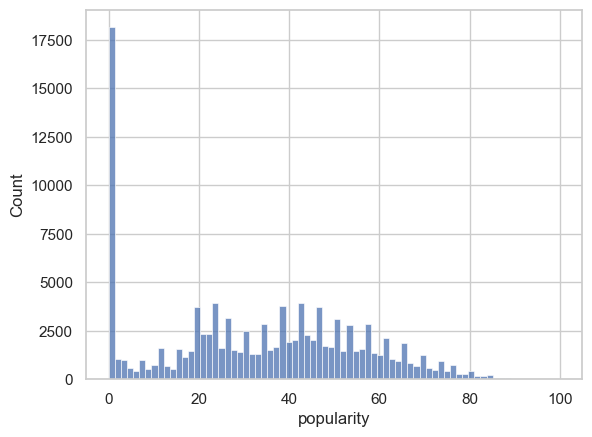

In [82]:
sns.histplot(data['popularity'])
print("Skewness: " + str(data['popularity'].skew()))
print("Kurtosis: " + str(data['popularity'].kurt()))

Skewness: 11.195181480127456
Kurtosis: 354.95241564263887


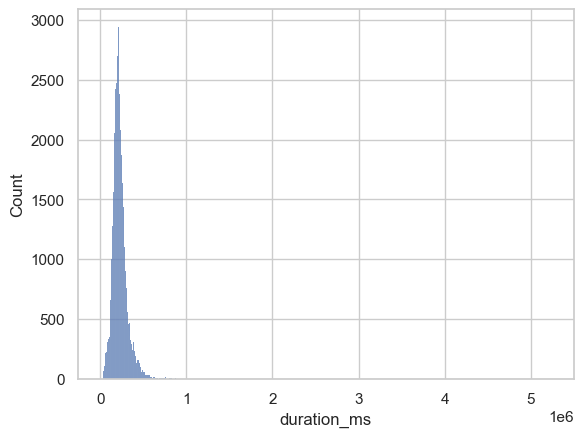

In [83]:
sns.histplot(data['duration_ms'])
print("Skewness: " + str(data['duration_ms'].skew()))
print("Kurtosis: " + str(data['duration_ms'].kurt()))

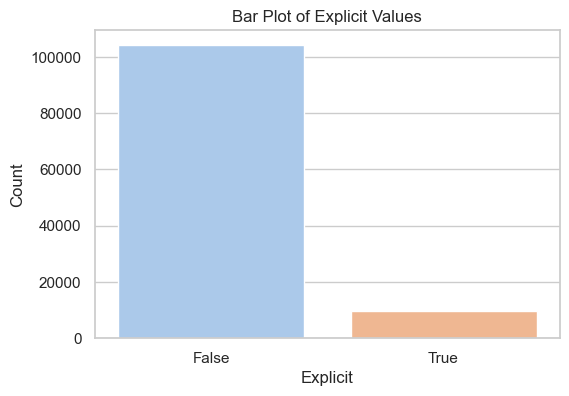

In [84]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='explicit', data=data, palette='pastel')
plt.xlabel('Explicit')
plt.ylabel('Count')
plt.title('Bar Plot of Explicit Values')

plt.show()

Skewness: -0.3994966335143628
Kurtosis: -0.18450245473330362


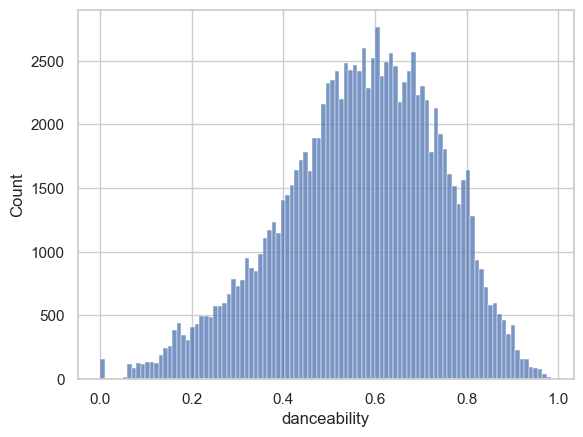

In [85]:
sns.histplot(data['danceability'])
print("Skewness: " + str(data['danceability'].skew()))
print("Kurtosis: " + str(data['danceability'].kurt()))

Skewness: -0.5970014170202241
Kurtosis: -0.5257108246740891


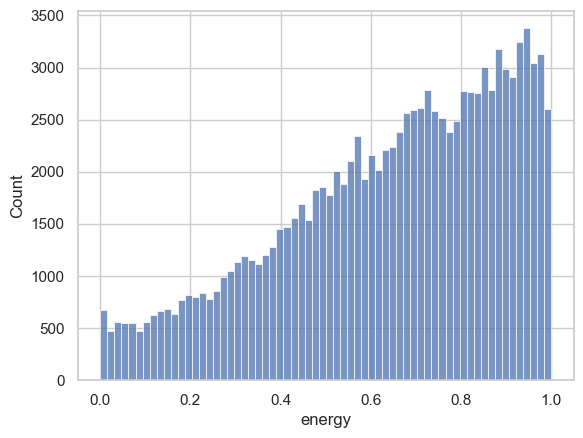

In [86]:
sns.histplot(data['energy'])
print("Skewness: " + str(data['energy'].skew()))
print("Kurtosis: " + str(data['energy'].kurt()))

Skewness: -0.008500360453707502
Kurtosis: -1.276571185663132


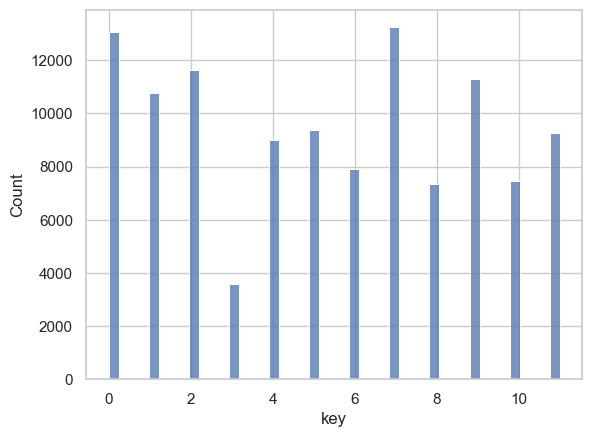

In [87]:
sns.histplot(data['key'])
print("Skewness: " + str(data['key'].skew()))
print("Kurtosis: " + str(data['key'].kurt()))

Skewness: -2.006541933727139
Kurtosis: 5.896278177992194


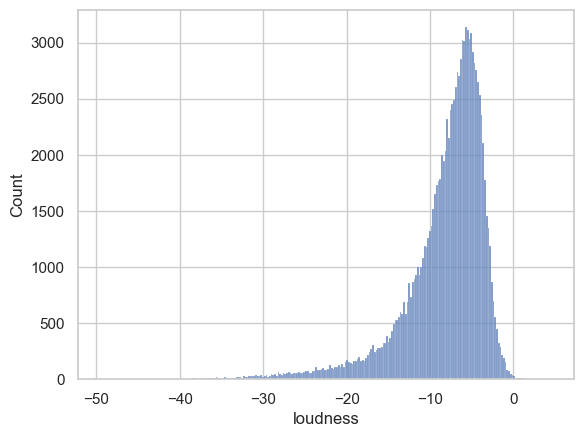

In [88]:
sns.histplot(data['loudness'])
print("Skewness: " + str(data['loudness'].skew()))
print("Kurtosis: " + str(data['loudness'].kurt()))

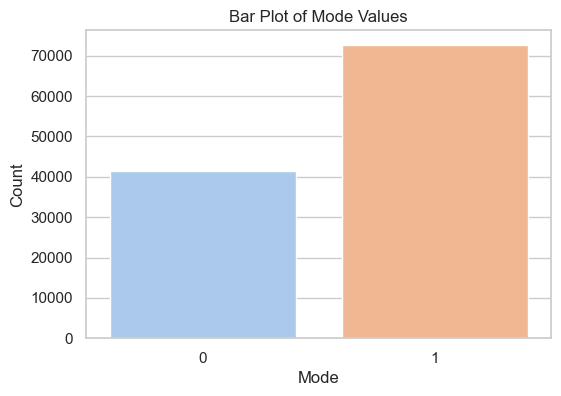

In [89]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='mode', data=data, palette='pastel')

plt.xlabel('Mode')
plt.ylabel('Count')
plt.title('Bar Plot of Mode Values')

plt.show()

Skewness: 4.647516017826189
Kurtosis: 28.82437674011652


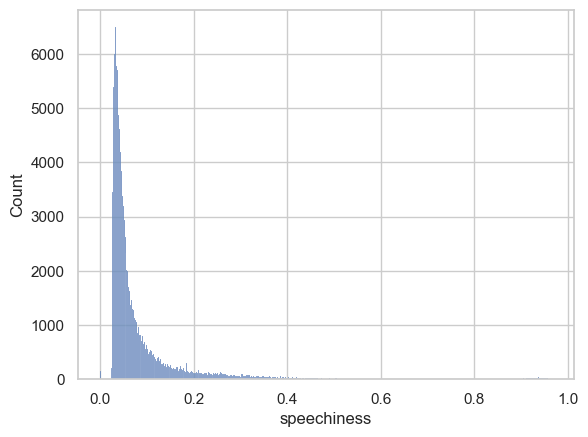

In [90]:
sns.histplot(data['speechiness'])
print("Skewness: " + str(data['speechiness'].skew()))
print("Kurtosis: " + str(data['speechiness'].kurt()))

Skewness: 0.7272948607217836
Kurtosis: -0.9499312857530788


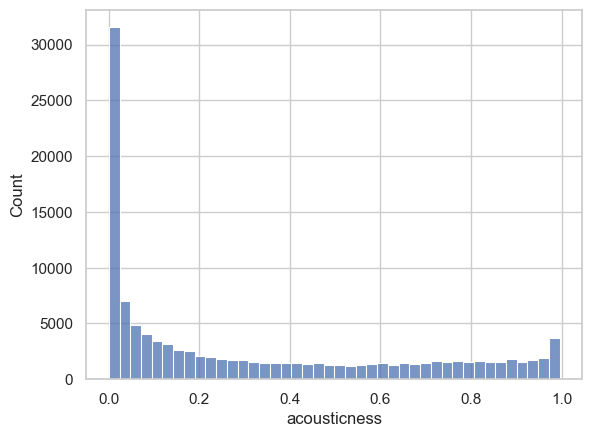

In [91]:
sns.histplot(data['acousticness'])
print("Skewness: " + str(data['acousticness'].skew()))
print("Kurtosis: " + str(data['acousticness'].kurt()))

Skewness: 1.7344061926796162
Kurtosis: 1.27074707838654


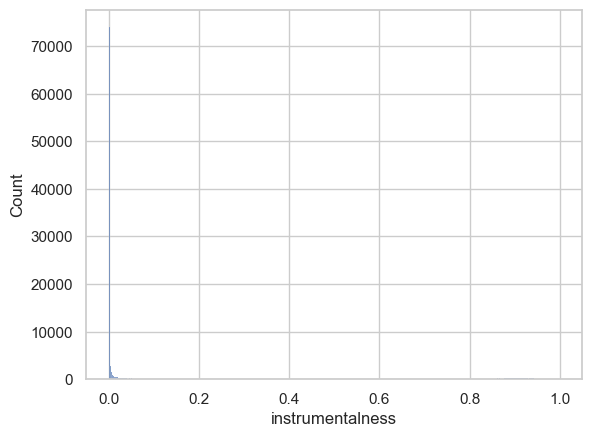

In [92]:
sns.histplot(data['instrumentalness'])
print("Skewness: " + str(data['instrumentalness'].skew()))
print("Kurtosis: " + str(data['instrumentalness'].kurt()))

Skewness: 2.1057381171120295
Kurtosis: 4.378268262329067


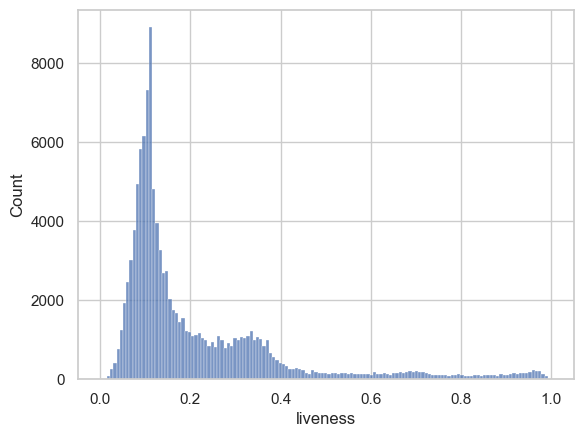

In [93]:
sns.histplot(data['liveness'])
print("Skewness: " + str(data['liveness'].skew()))
print("Kurtosis: " + str(data['liveness'].kurt()))

Skewness: 0.1150780420510666
Kurtosis: -1.0274297351965764


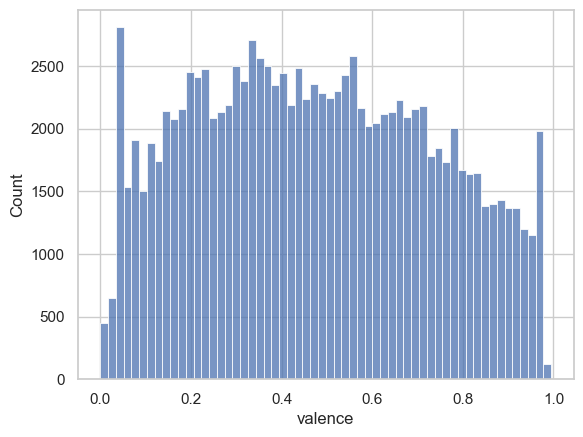

In [94]:
sns.histplot(data['valence'])
print("Skewness: " + str(data['valence'].skew()))
print("Kurtosis: " + str(data['valence'].kurt()))

Skewness: 0.23229486055177012
Kurtosis: -0.10858060813861048


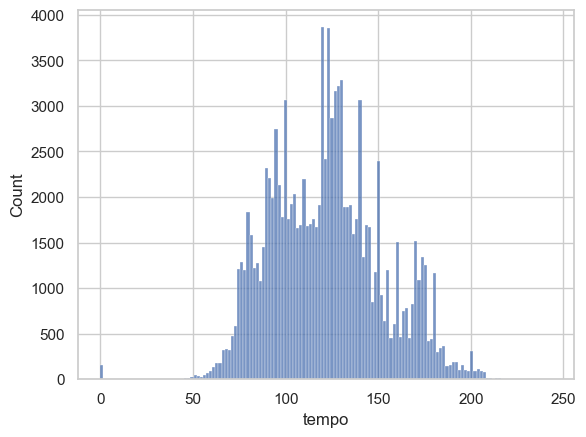

In [95]:
sns.histplot(data['tempo'])
print("Skewness: " + str(data['tempo'].skew()))
print("Kurtosis: " + str(data['tempo'].kurt()))

Skewness: -4.098316671758467
Kurtosis: 26.01323832146783


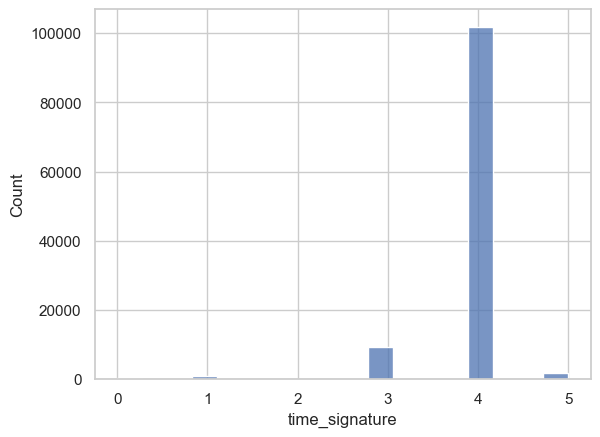

In [96]:
sns.histplot(data['time_signature'])
print("Skewness: " + str(data['time_signature'].skew()))
print("Kurtosis: " + str(data['time_signature'].kurt()))

#### Visualizing Features' Outliers
Based on the distributions the features: 'duration_ms','loudness', 'speechiness', 'instrumentalness', 'liveness' and 'tempo' have some outliers.

_observations_:

1. **duration_ms** : around 5% are outliers
2. **loudness** : around 6% are outliers
3. **speechiness**: >10% are outliers
4. **instrumentalness** : >20% are outliers 
5. **liveness** : around 7.5% are outliers
6. **tempo** : around 0.05% are outliers

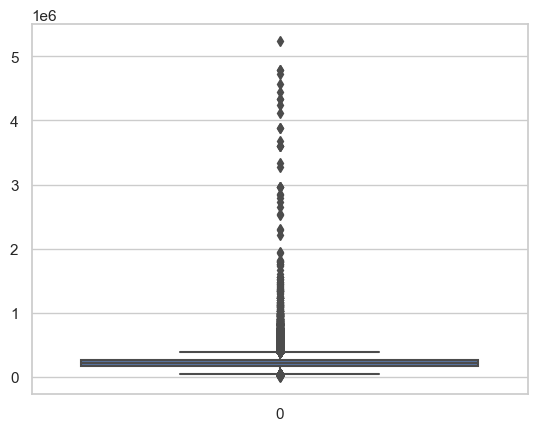

In [97]:
sns.boxplot(data=data['duration_ms'])
plt.show()

<Axes: >

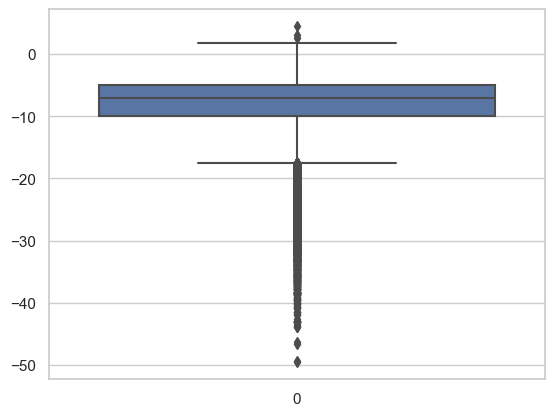

In [98]:
sns.boxplot(data=data['loudness'])

<Axes: >

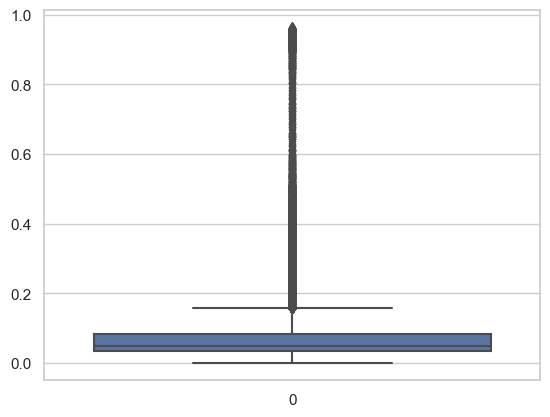

In [99]:
sns.boxplot(data=data['speechiness'])

<Axes: >

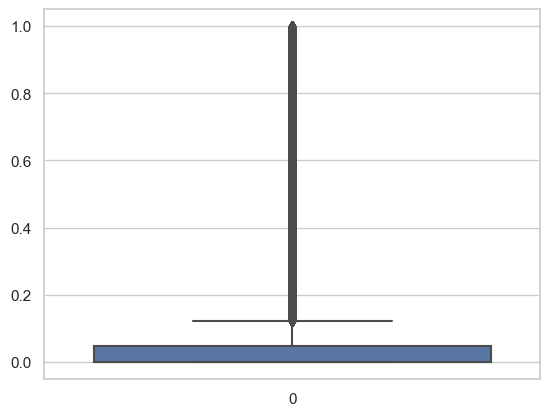

In [100]:
sns.boxplot(data=data['instrumentalness'])

<Axes: >

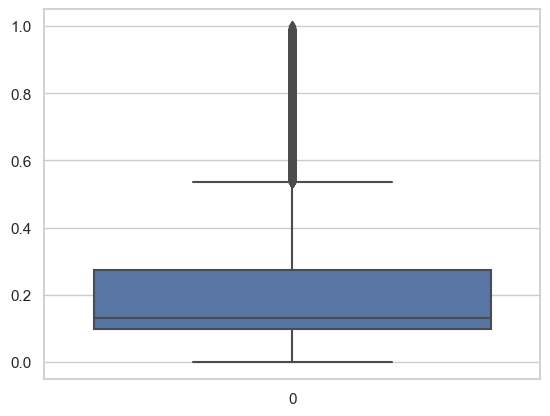

In [101]:
sns.boxplot(data=data['liveness'])

<Axes: >

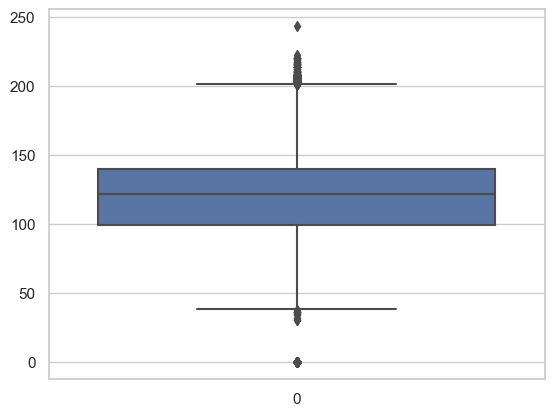

In [102]:
sns.boxplot(data=data['tempo'])

In [103]:
def count_outliers(data):
    
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (data < lower_bound) | (data > upper_bound)
    num_outliers = np.sum(outliers)

    return num_outliers

print('Outliers Count')
print('duration_ms: ' + str(count_outliers(data['duration_ms'])))
print('loudness: ' + str(count_outliers(data['loudness'])))
print('speechiness: ' + str(count_outliers(data['speechiness'])))
print('instrumentalness: ' + str(count_outliers(data['instrumentalness'])) )
print('liveness: ' + str(count_outliers(data['liveness'])))
print('tempo: ' + str(count_outliers(data['tempo'])))

Outliers Count
duration_ms: 5617
loudness: 6173
speechiness: 13211
instrumentalness: 25246
liveness: 8642
tempo: 617


#### Correlation Analysis

_observations:_ 

1. High correlation between some features
    1. loudness-energy(+0.76)
    2. acousticness-energy(-0.73)
    3. acousticness-loudness(-0.59) 
    4. danceability-valence(+0.48)
    5. loudness-instrumentalness(-0.43)
    6. valence-instrumentalness(-0.32)
    7. explicit-speechiness(0.31)
2. PairPlot between numeric features
3. Highly Correlated features and the target feature

##### Correlation Analysis between all features

<Axes: >

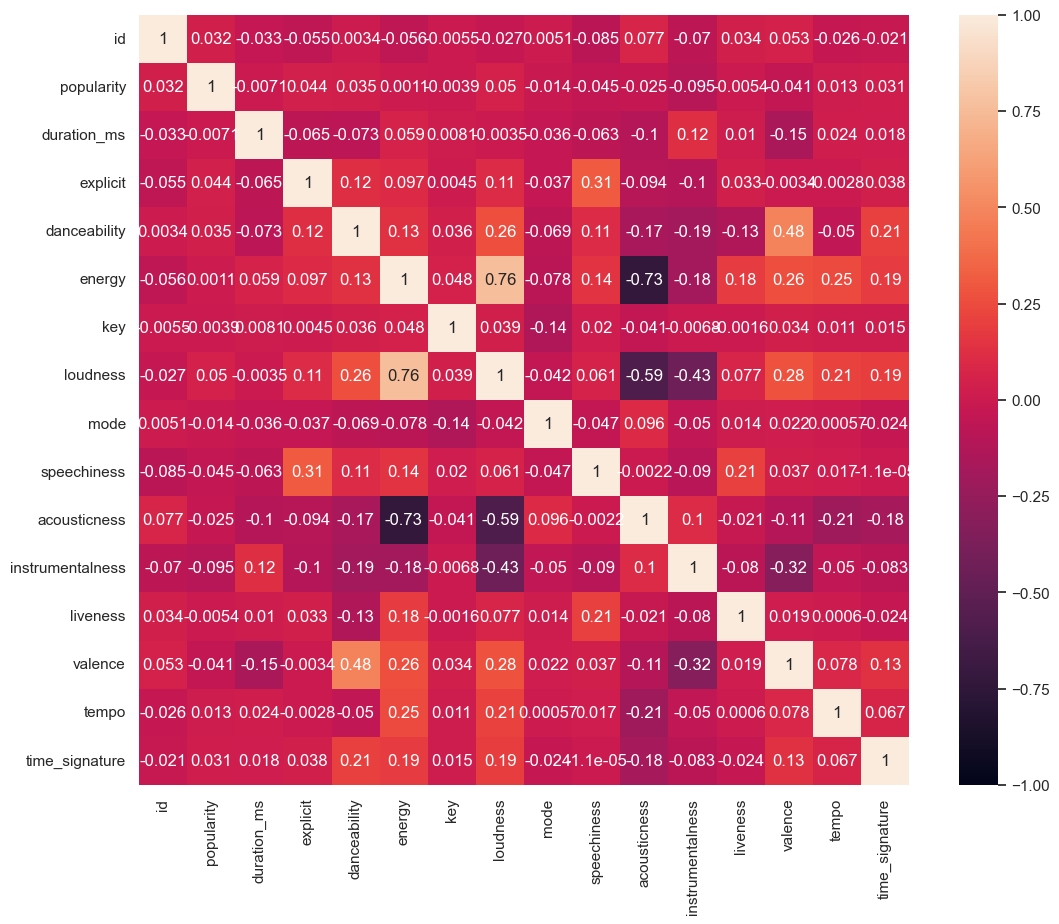

In [104]:
corr_matrix = data.corr(numeric_only=True)
f,ax = plt.subplots(figsize = (13,10))
sns.heatmap(corr_matrix, vmin=-1, vmax= 1, square =True, annot = True)

##### Pairplots between highly correlated features

/Users/josef/miniconda3/envs/DAA_3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


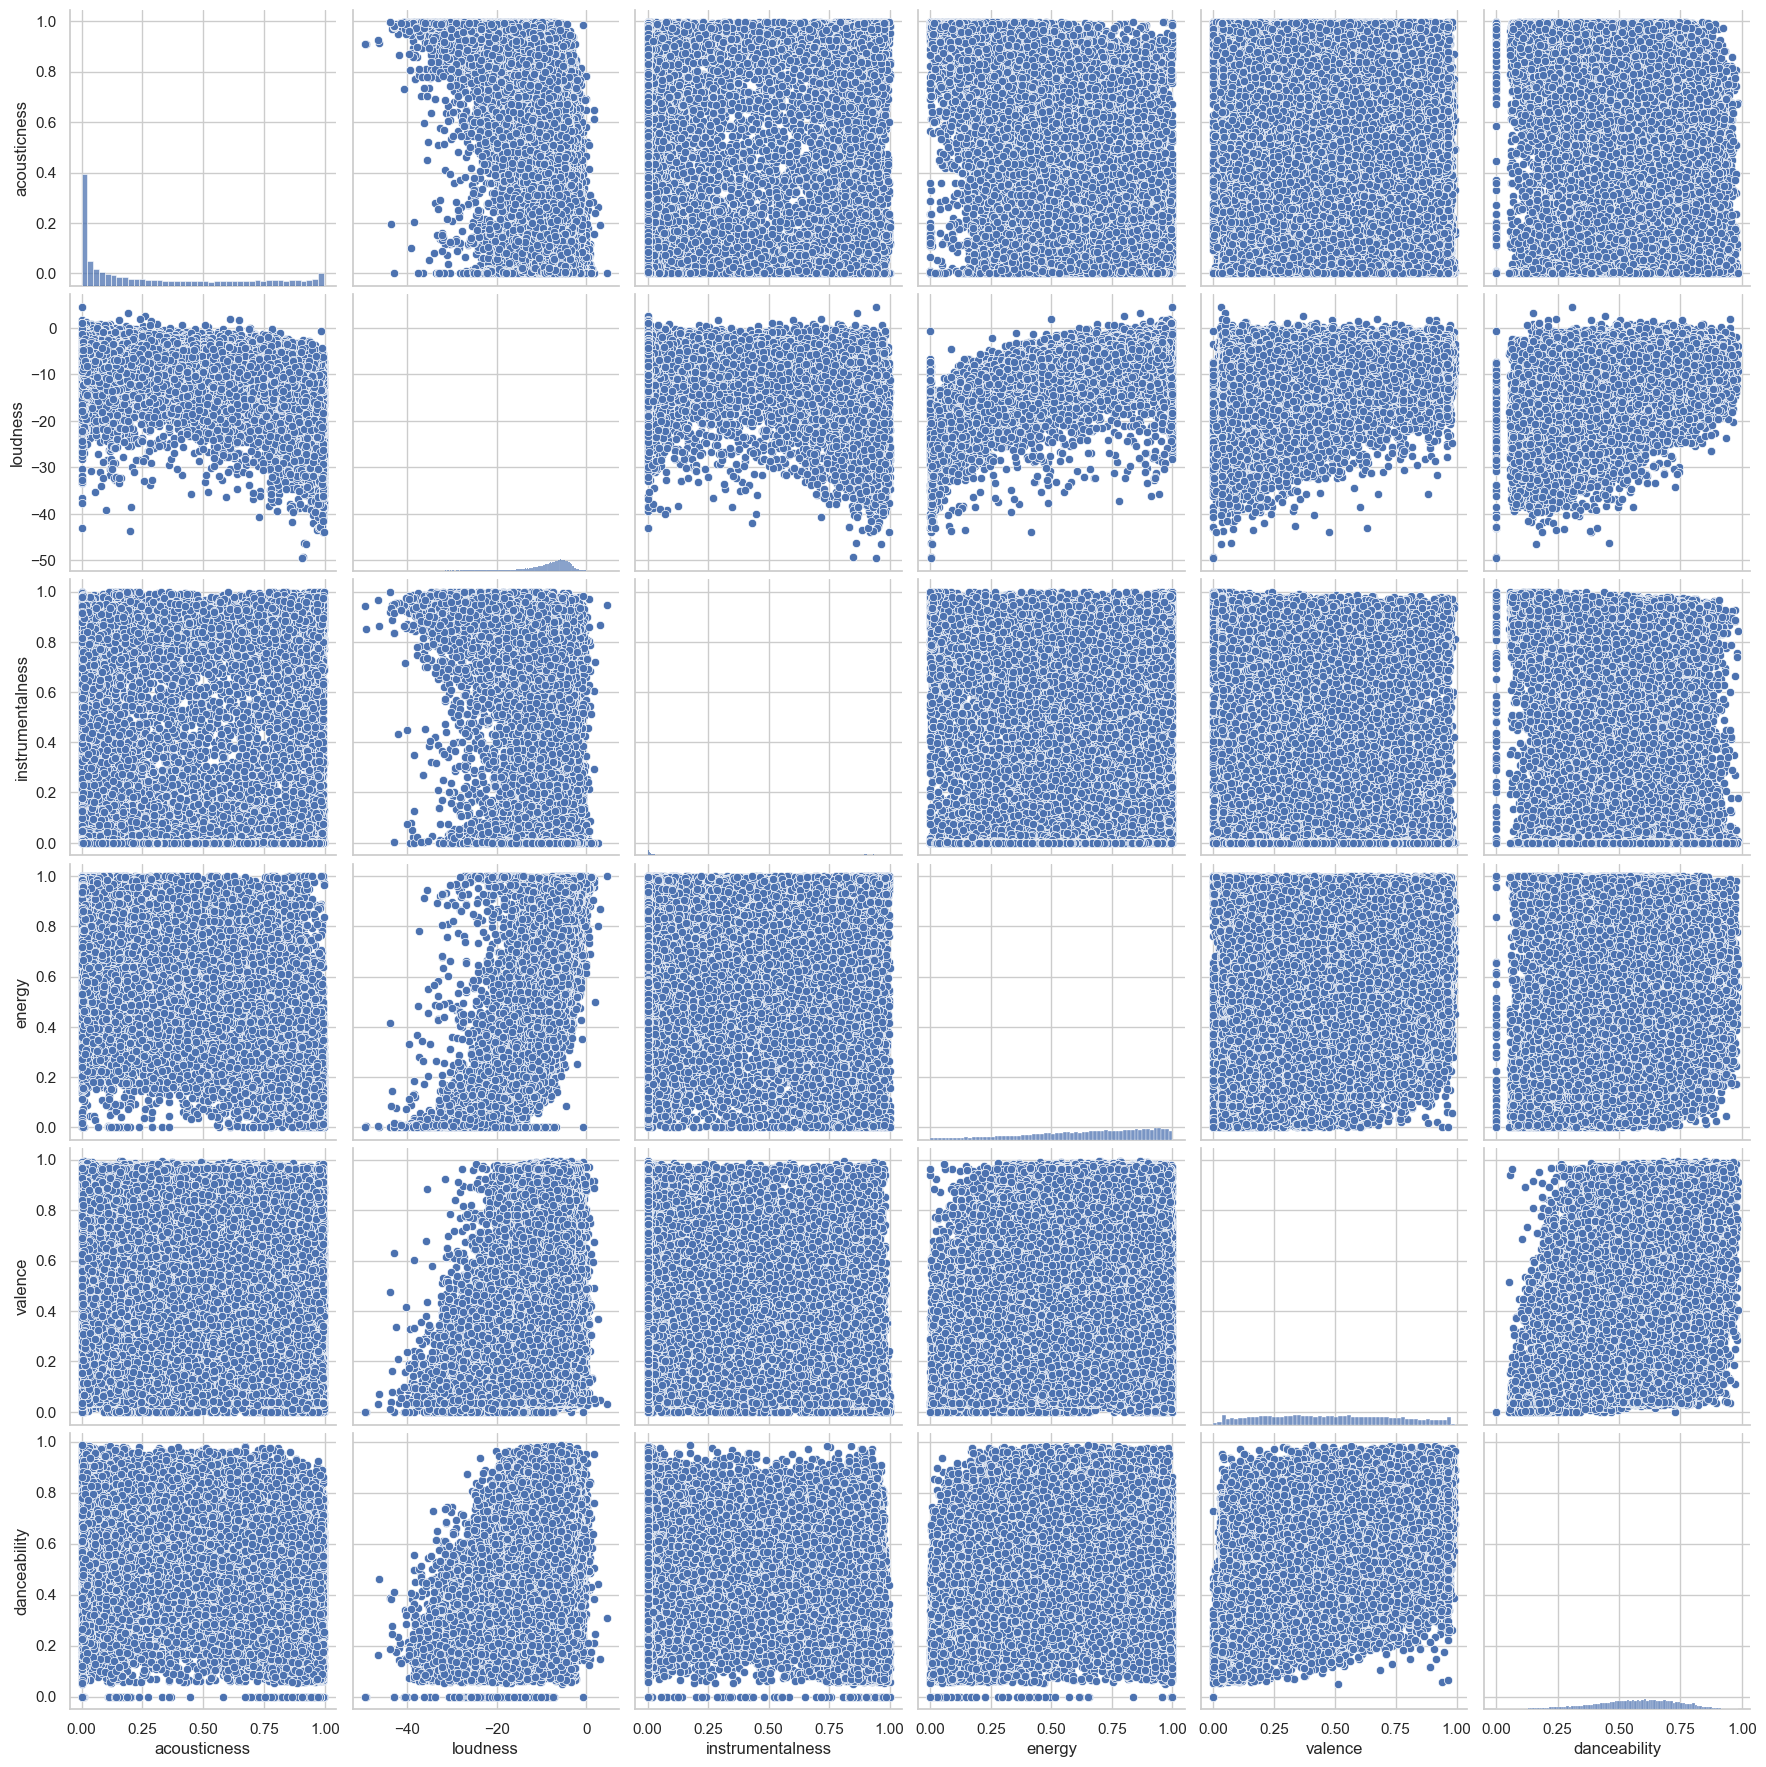

In [105]:
cols = ['acousticness','loudness','instrumentalness','energy','valence','danceability']
_ = sns.pairplot(data[cols], height = 3)

##### Deeper analysis between features

/Users/josef/miniconda3/envs/DAA_3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


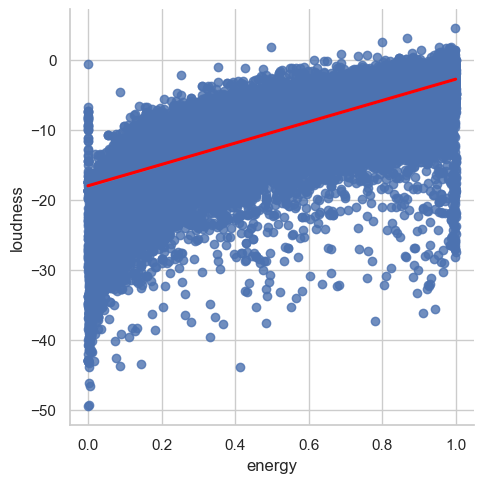

In [106]:
sns.lmplot(data=data, x="energy", y="loudness",height=5, line_kws={'color': "red"})


/Users/josef/miniconda3/envs/DAA_3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


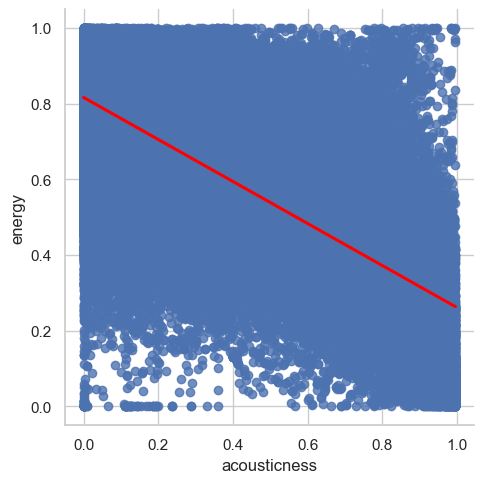

In [107]:
sns.lmplot(data=data, x="acousticness", y="energy",height=5, line_kws={'color': "red"})

/Users/josef/miniconda3/envs/DAA_3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


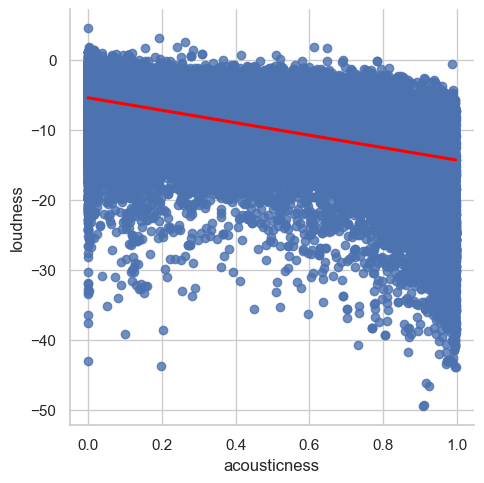

In [108]:
sns.lmplot(data=data, x="acousticness", y="loudness", height=5, line_kws={'color': "red"})

In [109]:
correlation_matrix = data.corr(numeric_only=True)
target_correlations = correlation_matrix['popularity'].abs()
best_predictor = target_correlations.idxmax()

target_correlations.sort_values(ascending=False)

popularity          1.000000
instrumentalness    0.095139
loudness            0.050423
speechiness         0.044927
explicit            0.044082
valence             0.040534
danceability        0.035448
id                  0.032142
time_signature      0.031073
acousticness        0.025472
mode                0.013931
tempo               0.013205
duration_ms         0.007101
liveness            0.005387
key                 0.003853
energy              0.001056
Name: popularity, dtype: float64

## Basic Data Preparation
In this phase the data undergoes a basic preparation so we can test a baseline model.

This phase follows the given structure:

1. Dropping Features
    1. Drop id
    2. Drop track_id
    3. Drop artist
    4. Drop track_name
    5. Drop album_name
2. Dealing with column types
    1. explicit (boolean -> binary)
    2. track_genre (one hot encoding)
3. Dealing with Missing Values

##### Dropping Features

In [110]:
basic_prep = data.drop(['id','track_id','artists','track_name','album_name'], axis=1)
basic_prep

popularity  duration_ms  explicit  danceability  energy  key  \
0               73       230666     False         0.676  0.4610    1   
1               55       149610     False         0.420  0.1660    1   
2               57       210826     False         0.438  0.3590    0   
3               71       201933     False         0.266  0.0596    0   
4               82       198853     False         0.618  0.4430    2   
...            ...          ...       ...           ...     ...  ...   
113995          21       384999     False         0.172  0.2350    5   
113996          22       385000     False         0.174  0.1170    0   
113997          22       271466     False         0.629  0.3290    0   
113998          41       283893     False         0.587  0.5060    7   
113999          22       241826     False         0.526  0.4870    1   

        loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0         -6.746     0       0.1430        0.0322          0.000001    0.3580   
1        -17.235     1       0.0763        0.9240          0.000006    0.1010   
2         -9.734     1       0.0557        0.2100          0.000000    0.1170   
3        -18.515     1       0.0363        0.9050          0.000071    0.1320   
4         -9.681     1       0.0526        0.4690          0.000000    0.0829   
...          ...   ...          ...           ...               ...       ...   
113995   -16.393     1       0.0422        0.6400          0.928000    0.0863   
113996   -18.318     0       0.0401        0.9940          0.976000    0.1050   
113997   -10.895     0       0.0420        0.8670          0.000000    0.0839   
113998   -10.889     1       0.0297        0.3810          0.000000    0.2700   
113999   -10.204     0       0.0725        0.6810          0.000000    0.0893   

        valence    tempo  time_signature  track_genre  
0        0.7150   87.917               4     acoustic  
1        0.2670   77.489               4     acoustic  
2        0.1200   76.332               4     acoustic  
3        0.1430  181.740               3     acoustic  
4        0.1670  119.949               4     acoustic  
...         ...      ...             ...          ...  
113995   0.0339  125.995               5  world-music  
113996   0.0350   85.239               4  world-music  
113997   0.7430  132.378               4  world-music  
113998   0.4130  135.960               4  world-music  
113999   0.7080   79.198               4  world-music  

[114000 rows x 16 columns]

##### Type modification

Explicit (Boolean -> Binary(Int))

In [111]:
basic_prep['explicit'].unique()

array([False,  True])

In [112]:
explicit_list =  basic_prep['explicit'].astype(int)
explicit_replaced = pd.DataFrame({'explicit' : explicit_list })
basic_prep.drop(['explicit'], axis = 1, inplace = True)
basic_prep = pd.concat([explicit_replaced, basic_prep], axis = 1)

One Hot Encoding of 'track_genre'

In [113]:
lb = LabelBinarizer()
lb_results = lb.fit_transform(basic_prep['track_genre'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

lb_results_df.head()
basic_prep = pd.concat([lb_results_df, basic_prep], axis = 1)
basic_prep.drop(['track_genre'], axis=1, inplace=True)

In [114]:
basic_prep

acoustic  afrobeat  alt-rock  alternative  ambient  anime  \
0              1         0         0            0        0      0   
1              1         0         0            0        0      0   
2              1         0         0            0        0      0   
3              1         0         0            0        0      0   
4              1         0         0            0        0      0   
...          ...       ...       ...          ...      ...    ...   
113995         0         0         0            0        0      0   
113996         0         0         0            0        0      0   
113997         0         0         0            0        0      0   
113998         0         0         0            0        0      0   
113999         0         0         0            0        0      0   

        black-metal  bluegrass  blues  brazil  ...  key  loudness  mode  \
0                 0          0      0       0  ...    1    -6.746     0   
1                 0          0      0       0  ...    1   -17.235     1   
2                 0          0      0       0  ...    0    -9.734     1   
3                 0          0      0       0  ...    0   -18.515     1   
4                 0          0      0       0  ...    2    -9.681     1   
...             ...        ...    ...     ...  ...  ...       ...   ...   
113995            0          0      0       0  ...    5   -16.393     1   
113996            0          0      0       0  ...    0   -18.318     0   
113997            0          0      0       0  ...    0   -10.895     0   
113998            0          0      0       0  ...    7   -10.889     1   
113999            0          0      0       0  ...    1   -10.204     0   

        speechiness  acousticness  instrumentalness  liveness  valence  \
0            0.1430        0.0322          0.000001    0.3580   0.7150   
1            0.0763        0.9240          0.000006    0.1010   0.2670   
2            0.0557        0.2100          0.000000    0.1170   0.1200   
3            0.0363        0.9050          0.000071    0.1320   0.1430   
4            0.0526        0.4690          0.000000    0.0829   0.1670   
...             ...           ...               ...       ...      ...   
113995       0.0422        0.6400          0.928000    0.0863   0.0339   
113996       0.0401        0.9940          0.976000    0.1050   0.0350   
113997       0.0420        0.8670          0.000000    0.0839   0.7430   
113998       0.0297        0.3810          0.000000    0.2700   0.4130   
113999       0.0725        0.6810          0.000000    0.0893   0.7080   

          tempo  time_signature  
0        87.917               4  
1        77.489               4  
2        76.332               4  
3       181.740               3  
4       119.949               4  
...         ...             ...  
113995  125.995               5  
113996   85.239               4  
113997  132.378               4  
113998  135.960               4  
113999   79.198               4  

[114000 rows x 129 columns]

##### Dealing with Missing Values

As seen in the data visualization there was a few missing values but because they were located on the columns removed in the previous action so there's no need to remove any line.


## Baseline Model 
Modeling the problem with basic to none data preparation so we can evaluate progress.

Regression Models:
-    1. Regression tree
-    2. Linear regression

In [115]:
target = basic_prep['popularity']
values = basic_prep.drop(['popularity'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(values, target, test_size=0.4, random_state=2022)

#### Regression Tree

In [116]:
dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)
prediction_dt = dt.predict(X_test)

print(dt.score(X_test, y_test))

0.028326331711703734


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


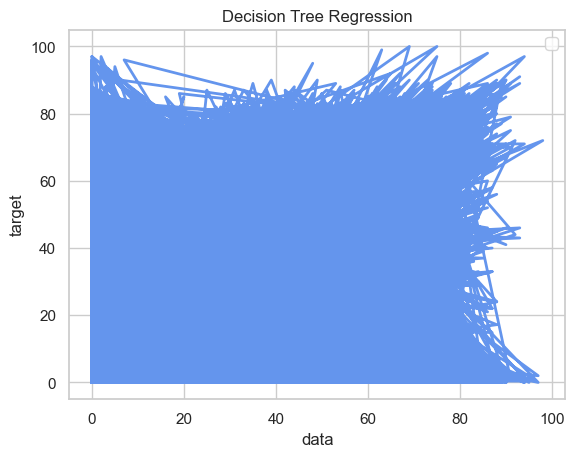

In [117]:
plt.plot(y_test, prediction_dt, color="cornflowerblue", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

#### Linear Regression

In [118]:
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MSE: 373.9630315451624
MAE: 14.181756090937306
RMSE: 19.338123785547612


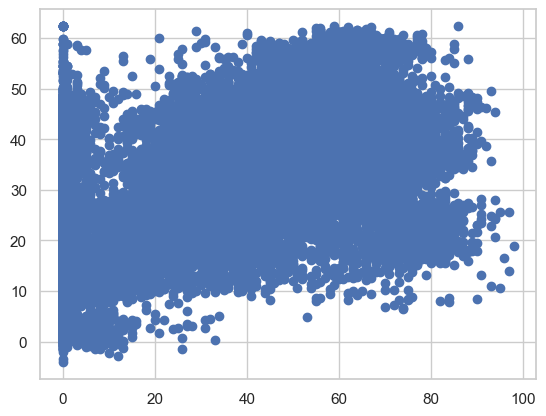

In [119]:
plt.scatter(y_test,y_pred)

## Advanced Data Prep

1. Some of the same Basic Preparation procedures
    1. Dropping features
        1. Same as previous preparation (except 'track_id')
    2. Dealing with column types (only 'explicit')

2. Map Sub-genres to Main-Genre
3. One Hot Encoding 'main_genre'
4. Aggregation of Repeated Tracks based on 'track_id'
    1. Aggreation of Repeated Tracks
    2. Dropping 'track_id' feature
5. Outliers Treatment
6. Feature Scaling (Normalization)
7. Feature Selection
    1. SelectKBest Model
    2. RandomForrestRegressor Model
    3. Remenbering Correlation Analysis
    3. Dropping Least Important Features

#### 1.1 Dropping Useless Features
The features _id_, _artists_, _track_name_ and _album_name_ are not valid metrics to predict popularity in our case of study. 
Opposite to the basic preparation this time we don't drop *track_id* at the begining because we need it to join repeated tracks.

_Rationale:_ useless features impact models negatively. The predictions should be based on the track metrics not on the artist or album.

_Solution_: drop features mentioned.

In [120]:
advanced_prep = data.drop(['id','artists','track_name','album_name'], axis=1)
advanced_prep.sample(5)

track_id  popularity  duration_ms  explicit  \
13947  2tzk9o0OORvRP4ib1VQMqa           5       395800     False   
53642  2z7FZQBroe6m4GcJl7Q7eU           0       178480     False   
38993  1q0p7dl60AA7BVzJVrnxmL          24       139640     False   
96565  1y7hrNAKGlj9fYId6Drhql          39       100600     False   
21267  1XhaUSmhANVIRtDvs7p2UP          65       195134     False   

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
13947         0.771   0.838    4    -9.752     0       0.0769         0.169   
53642         0.636   0.880    9    -2.853     1       0.1370         0.296   
38993         0.305   0.991    5    -2.975     1       0.1910         0.088   
96565         0.681   0.449    7   -10.524     1       0.0660         0.364   
21267         0.554   0.509    1    -9.429     1       0.3390         0.149   

       instrumentalness  liveness  valence    tempo  time_signature  \
13947          0.180000    0.1170    0.647  124.004               4   
53642          0.000003    0.0793    0.228   98.855               4   
38993          0.000000    0.5440    0.660  139.900               4   
96565          0.000000    0.1420    0.575  172.032               4   
21267          0.000019    0.0940    0.718  199.874               4   

         track_genre  
13947  chicago-house  
53642          house  
38993         garage  
96565          samba  
21267      dancehall

#### 1.2. Dealing with column types (only 'explicit')

_Rationale:_ feature of type Bool needs to turn into Binary
_Solution_: change True for 1 and False for 0.

In [121]:
explicit_list =  advanced_prep['explicit'].astype(int)
explicit_replaced = pd.DataFrame({'explicit' : explicit_list })
advanced_prep.drop(['explicit'], axis = 1, inplace = True)
advanced_prep = pd.concat([advanced_prep,explicit_replaced], axis = 1)

#### 2. Mapping Sub-Genres into a Main-Genre
To many sub-genres introduces to much noise in the data set.

_Rationale:_ Too many sub-genres adds to much noise to a single feature, making the one hot encoding produce extra 136 collumns.

_Solution_: Group sub-genres into a larger genre.

In [122]:
genre_mapping = {
    'rock': ['alt-rock', 'grunge', 'punk', 'punk-rock', 'rock', 'rock-n-roll', 'psych-rock', 'j-rock'],
    'electronic': ['breakbeat', 'chill', 'club', 'deep-house', 'disco', 'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic', 'house', 'idm', 'techno', 'trance', 'trip-hop', 'j-synth', 'hardstyle', 'synth-pop'],
    'pop': ['pop', 'pop-film', 'power-pop', 'j-pop', 'j-idol'],
    'hip-pop': ['hip-pop'],
    'rnb': ['r-n-b', 'groove'],
    'metal': ['black-metal', 'death-metal', 'heavy-metal', 'metal', 'metalcore'],
    'world': ['afrobeat', 'brazil', 'canto-pop', 'french', 'german', 'indian', 'iranian', 'k-pop', 'latin','reggaeton', 'latino', 'malay', 'mandopop', 'turkish', 'world-music', 'anime', 'british', 'cantopop', 'swedish', 'spanish', 'salsa', 'samba', 'tango'],
    'jazz': ['blues', 'jazz', 'gospel', 'soul', 'funk', 'ska'],
    'classical': ['classical', 'opera'],
    'country': ['bluegrass', 'country', 'folk', 'forro', 'honky-tonk', 'sertanejo', 'mpb', 'pagode'],
    'reggae': ['reggae'],
    'dance': ['chicago-house', 'dancehall', 'disco', 'party', 'funk', 'progressive-house', 'j-dance'],
    'indie': ['indie', 'indie-pop', 'alternative'],
    'kids': ['children', 'kids', 'disney'],
    'acoustic': ['acoustic', 'singer-songwriter', 'songwriter'],
    'instrumental': ['instrumental', 'guitar', 'ambient', 'piano', 'sleep', 'study', 'ambient'],
    'hardcore': ['hardcore'],
    'other': ['comedy', 'happy', 'sad', 'romance']
}


advanced_prep['main_genre'] = advanced_prep['track_genre'].map(lambda subgenre: next((genre for genre, subgenres in genre_mapping.items() if subgenre in subgenres), 'other'))


In [123]:
advanced_prep = advanced_prep.drop(['track_genre'], axis=1)
advanced_prep.sample(5)

track_id  popularity  duration_ms  danceability  energy  \
112540  6kM4A4oVGsNkoy0hgh90Dj          40       179760         0.539   0.343   
87735   0CfthwI2zWPVci5b2ZwA5F          41       149733         0.350   0.966   
62607   0ldzDKNON23ajcssPHjTKH          53       243000         0.428   0.931   
1958    01zqlg8u8YHdSNdlgTUJUm          16       177173         0.584   0.629   
15669   0SLE0Ym3WhxfHSDR7Qd5pf          65       158000         0.641   0.436   

        key  loudness  mode  speechiness  acousticness  instrumentalness  \
112540    7    -9.673     0       0.0377      0.374000          0.000002   
87735     2    -5.934     1       0.3100      0.173000          0.000056   
62607     1    -2.628     0       0.0500      0.000006          0.000002   
1958      6   -12.071     1       0.0429      0.014800          0.109000   
15669     6   -10.353     0       0.3230      0.636000          0.000027   

        liveness  valence    tempo  time_signature  explicit  main_genre  
112540    0.1040    0.580  180.011               5         0       world  
87735     0.4830    0.217  177.177               4         0         rnb  
62607     0.0746    0.575   93.984               4         0         pop  
1958      0.2410    0.519  150.745               4         0       world  
15669     0.1400    0.535  129.080               4         0  electronic

#### 3. One Hot Encoding 'main_genre'


_Rationale:_ 'main_genre' is of 'object' type and should be turned into a numerical value without imposing an order.
_Solution_: One hot enconding the feature ensures not implicit order

In [124]:
lb = LabelBinarizer()
lb_results = lb.fit_transform(advanced_prep['main_genre'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

lb_results_df.head()
advanced_prep = pd.concat([advanced_prep,lb_results_df], axis = 1)
advanced_prep.drop(['main_genre'], axis=1, inplace=True)

In [125]:
advanced_prep.sample(5)

track_id  popularity  duration_ms  danceability  energy  \
35973  2AuCYE3NYMHHHya1HAt7MC          37       256390         0.845   0.836   
40982  0OF2DIIrDMpFhPuNMIYdMd          38       264320         0.209   0.341   
43532  3iUJrkMilUVkUKtYZK7Th4          57       376920         0.534   0.969   
34022  2pUpNOgJBIBCcjyQZQ00qU          75       252733         0.445   0.541   
70288  7txxlRXT1wL96udmCFVqnj          54       264653         0.376   0.541   

       key  loudness  mode  speechiness  acousticness  ...  instrumental  \
35973    7    -2.678     1       0.0847      0.221000  ...             0   
40982   10   -10.403     1       0.0357      0.808000  ...             0   
43532    3    -3.378     1       0.0535      0.000359  ...             0   
34022    7    -7.360     1       0.0736      0.359000  ...             0   
70288   11    -7.702     1       0.0297      0.483000  ...             0   

       jazz  kids  metal  other  pop  reggae  rnb  rock  world  
35973     0     0      0      0    0       0    0     0      0  
40982     1     0      0      0    0       0    0     0      0  
43532     0     0      0      0    0       0    1     0      0  
34022     0     0      0      0    0       0    0     0      0  
70288     0     0      0      0    0       0    0     0      1  

[5 rows x 33 columns]

#### 4. Aggregation of Repeated Tracks
Some tracks are repeated due to being in more than one genre.

_Rationale:_ repeated tracks  influence the data X times more than normal tracks

_Solution_: aggregate the Repeated Tracks joinning the genre in 1 line

In [126]:
duplicated_values = advanced_prep[advanced_prep.duplicated(subset='track_id', keep=False)]
duplicated_values["track_id"].count()

40900

In [127]:
#duplicated_values.sample(5)
advanced_prep.columns

Index(['track_id', 'popularity', 'duration_ms', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'explicit', 'acoustic', 'classical', 'country', 'dance', 'electronic',
       'hardcore', 'indie', 'instrumental', 'jazz', 'kids', 'metal', 'other',
       'pop', 'reggae', 'rnb', 'rock', 'world'],
      dtype='object')

In [128]:
example = duplicated_values[duplicated_values['track_id'] == '6Za3190Sbw39BBC77WSS1C']
example

track_id  popularity  duration_ms  danceability  energy  \
68657  6Za3190Sbw39BBC77WSS1C          75       232549         0.814   0.813   
88752  6Za3190Sbw39BBC77WSS1C          75       232549         0.814   0.813   
89710  6Za3190Sbw39BBC77WSS1C          75       232549         0.814   0.813   

       key  loudness  mode  speechiness  acousticness  ...  instrumental  \
68657    2    -3.023     0       0.0561          0.03  ...             0   
88752    2    -3.023     0       0.0561          0.03  ...             0   
89710    2    -3.023     0       0.0561          0.03  ...             0   

       jazz  kids  metal  other  pop  reggae  rnb  rock  world  
68657     0     0      0      0    0       0    0     0      1  
88752     0     0      0      0    0       1    0     0      0  
89710     0     0      0      0    0       0    0     0      1  

[3 rows x 33 columns]

In [129]:
binary_features = ['acoustic', 'classical', 'country', 'dance', 'electronic', 'hardcore',
       'indie', 'instrumental', 'jazz', 'kids', 'metal', 'other', 'pop',
       'reggae', 'rnb', 'rock', 'world']

advanced_prep = advanced_prep.groupby('track_id').agg({
    'popularity': 'first',
    'duration_ms': 'first',
    'energy': 'first',
    'key': 'first',
    'loudness':'first',
    'mode': 'first',
    'speechiness': 'first',
    'acousticness':'first',
    'instrumentalness': 'first',
    'liveness': 'first',
    'valence': 'first',
    'tempo': 'first',
    'time_signature': 'first',
    'explicit': 'first',
    **{feature: 'max' for feature in binary_features}
}).reset_index()

In [130]:
#example shown above with aggregation completed
filtered_value = advanced_prep[advanced_prep['track_id'] == '6Za3190Sbw39BBC77WSS1C']
filtered_value

track_id  popularity  duration_ms  energy  key  loudness  \
75707  6Za3190Sbw39BBC77WSS1C          75       232549   0.813    2    -3.023   

       mode  speechiness  acousticness  instrumentalness  ...  instrumental  \
75707     0       0.0561          0.03          0.000093  ...             0   

       jazz  kids  metal  other  pop  reggae  rnb  rock  world  
75707     0     0      0      0    0       1    0     0      1  

[1 rows x 32 columns]

In [131]:
#number of repeated tracks 
advanced_prep[advanced_prep.duplicated(subset='track_id', keep=False)]["track_id"].count()

0

In [132]:
#can finally drop 'track_id'
advanced_prep.drop(['track_id'], axis=1, inplace=True)

In [133]:
advanced_prep.sample(5)

popularity  duration_ms  energy  key  loudness  mode  speechiness  \
68132          47       197288   0.699    0    -6.630     1       0.0517   
89481          25       155760   0.960    1    -4.843     0       0.1500   
85817          26       189013   0.788    2    -4.597     1       0.0352   
84296          12       204173   0.938    5    -3.843     0       0.1490   
71165          43       148576   0.732    6    -8.724     0       0.2440   

       acousticness  instrumentalness  liveness  ...  instrumental  jazz  \
68132      0.003690          0.000234    0.4020  ...             0     0   
89481      0.000051          0.003460    0.0813  ...             0     0   
85817      0.388000          0.060000    0.5810  ...             0     0   
84296      0.152000          0.000000    0.0839  ...             0     0   
71165      0.003080          0.000000    0.0492  ...             0     0   

       kids  metal  other  pop  reggae  rnb  rock  world  
68132     0      0      0    0       0    0     0      0  
89481     0      0      1    0       0    0     0      0  
85817     0      0      1    0       0    0     0      0  
84296     0      0      0    0       0    0     0      0  
71165     0      0      0    0       0    0     0      0  

[5 rows x 31 columns]

#### 5. Outlier Treatment

Before normalizing some of the features the data outliers need to be delt with.

_Rationale:_ Outliers affect data distribution. 

_Solution_: Cap or cut outliers in features like ...

After analizing the outliers in chapter of Data Exploration and Visualization, some of the observations within each feature are:
1. **duration_ms** : around 5% are outliers
2. **loudness** : around 6% are outliers 
3. **speechiness**: >10% are outliers
4. **instrumentalness** : >20% are outliers 
5. **liveness** : around 7.5% are outliers
6. **tempo** : around 0.05% are outliers

PS: In this case, a value is consider outlier if it's not within the 1st and 3rd quartile

In order to don't lose to much information, the group opted to cap the outliers. Althought this stratagy removes outliers it affects the distrobution, so the solution adopted is to create costum values of bottom and top limits 

In [134]:
from scipy.stats import iqr

def cap_outliers(column, lower_threshold = 1.5,upper_threshold = 1.5):
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    iqr_value = iqr(column)
    
    lw_th = q1 - lower_threshold * iqr_value
    up_th = q3 + upper_threshold * iqr_value

    # Identify outliers
    outliers = (column < lw_th) | (column > up_th)

    # Winsorize only the outliers
    column[outliers] = np.clip(column[outliers], lw_th, up_th)

##### 1. duration_ms

/var/folders/wg/vtlbyrcn4mdbsgw4g9tx9_yc0000gn/T/ipykernel_52993/222542393.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[outliers] = np.clip(column[outliers], lw_th, up_th)


<Axes: xlabel='duration_ms', ylabel='Count'>

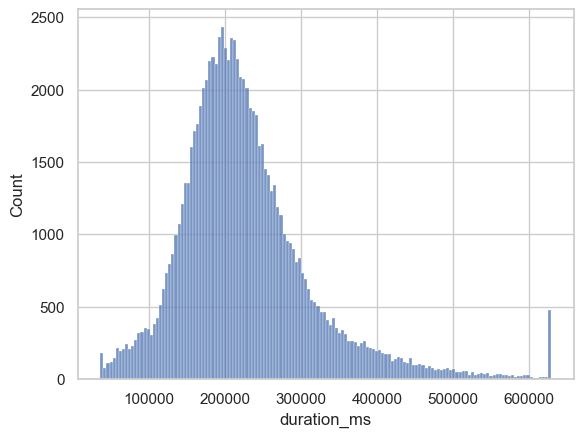

In [135]:
test = advanced_prep.copy()

var = test['duration_ms']
cap_outliers(var,1.5, 4)

#sns.boxplot(data=test['duration_ms'])
#plt.show()

advanced_prep['duration_ms'] = test['duration_ms']

sns.histplot(advanced_prep['duration_ms'])

##### 2. Loudness

/var/folders/wg/vtlbyrcn4mdbsgw4g9tx9_yc0000gn/T/ipykernel_52993/222542393.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[outliers] = np.clip(column[outliers], lw_th, up_th)


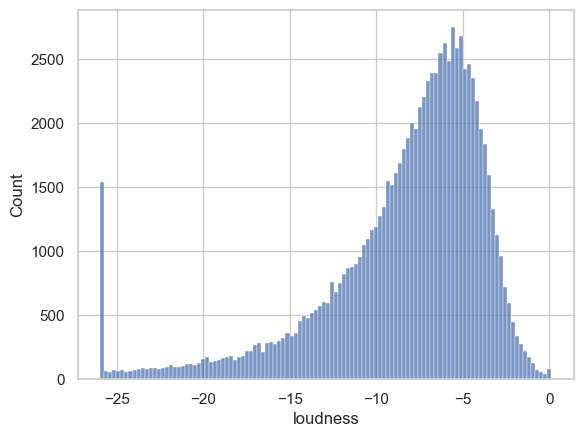

In [136]:
test = advanced_prep.copy()

var = test['loudness']
cap_outliers(var,3,1)

#sns.boxplot(data=test['loudness'])
#plt.show()
sns.histplot(test['loudness'])
advanced_prep['loudness'] = test['loudness']

##### 3. speechiness

/var/folders/wg/vtlbyrcn4mdbsgw4g9tx9_yc0000gn/T/ipykernel_52993/222542393.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[outliers] = np.clip(column[outliers], lw_th, up_th)


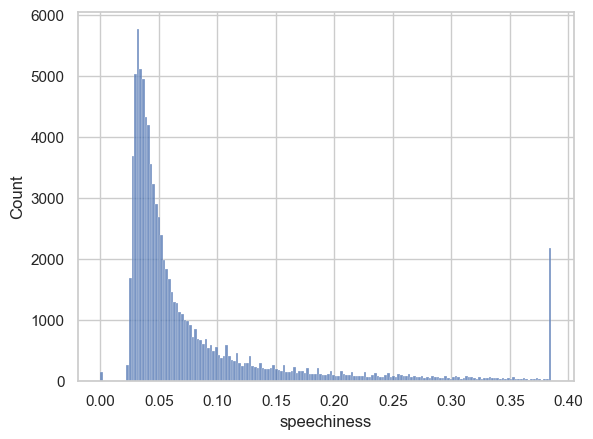

In [137]:
test = advanced_prep.copy()

var = test['speechiness']
cap_outliers(var,1,6)

#sns.boxplot(data=test['loudness'])
#plt.show()
sns.histplot(test['speechiness'])
advanced_prep['speechiness'] = test['speechiness']

##### 4. instrumentalness

/var/folders/wg/vtlbyrcn4mdbsgw4g9tx9_yc0000gn/T/ipykernel_52993/222542393.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[outliers] = np.clip(column[outliers], lw_th, up_th)


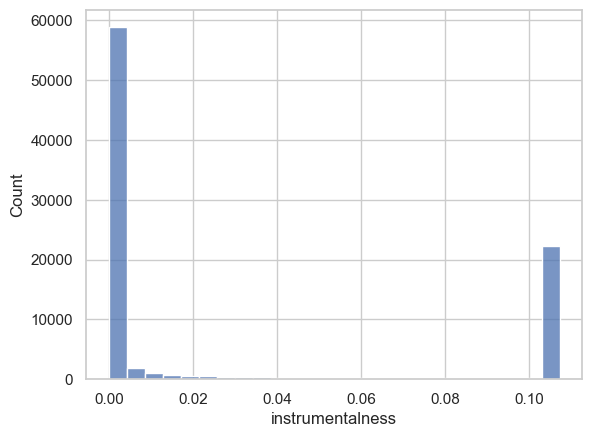

In [138]:
test = advanced_prep.copy()

# Assuming 'test' is your DataFrame and 'duration_ms' is the column to be winsorized
var = test['instrumentalness']

# Calculate the interquartile range (IQR)
cap_outliers(var,1,0.1)

#sns.boxplot(data=test['instrumentalness'])
#plt.show()
sns.histplot(test['instrumentalness'])

advanced_prep['instrumentalness'] = test['instrumentalness']

##### 5. liveness

/var/folders/wg/vtlbyrcn4mdbsgw4g9tx9_yc0000gn/T/ipykernel_52993/222542393.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[outliers] = np.clip(column[outliers], lw_th, up_th)


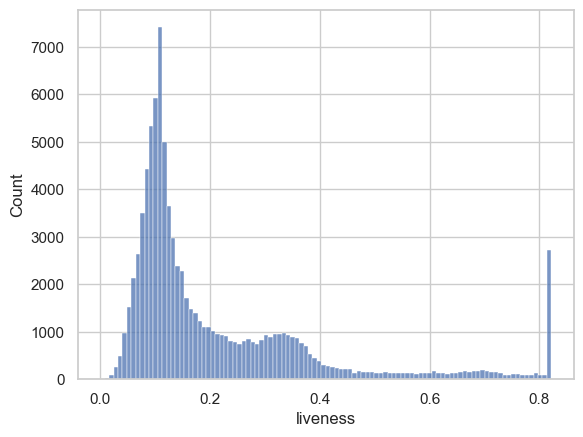

In [139]:
test = advanced_prep.copy()

# Assuming 'test' is your DataFrame and 'duration_ms' is the column to be winsorized
var = test['liveness']

# Calculate the interquartile range (IQR)
cap_outliers(var, 1.5, 3)

#sns.boxplot(data=test['liveness'])
#plt.show()
sns.histplot(test['liveness'])
advanced_prep['liveness'] = test['liveness']

##### 6. tempo

/var/folders/wg/vtlbyrcn4mdbsgw4g9tx9_yc0000gn/T/ipykernel_52993/222542393.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[outliers] = np.clip(column[outliers], lw_th, up_th)


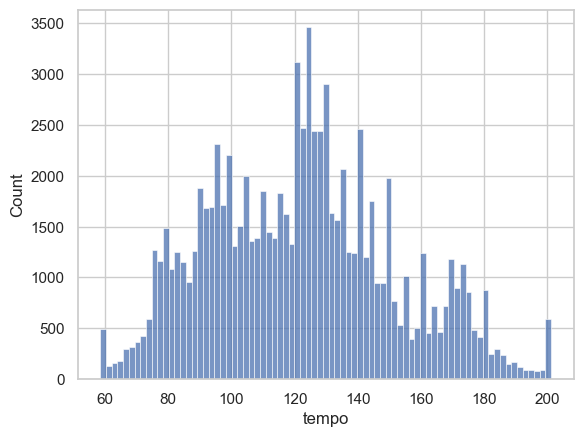

In [140]:
test = advanced_prep.copy()

# Assuming 'test' is your DataFrame and 'duration_ms' is the column to be winsorized
var = test['tempo']

# Calculate the interquartile range (IQR)
cap_outliers(var,1)

#sns.boxplot(data=test['tempo'])
#plt.show()
sns.histplot(test['tempo'])

advanced_prep['tempo'] = test['tempo']

#### 6. Feature Scaling
Most of the features are metrics that range from 0-1 so the scale of the data needs to be equal.

_Rationale:_ Different features scales affect model predictions, so they must be the same.

_Solution_: normaliza features like loudness, duration_ms 

##### 6.1 Values Normalization

In [141]:
scaler = MinMaxScaler()

#Normalizing values
advanced_prep['popularity'] = scaler.fit_transform(advanced_prep['popularity'].values.reshape(-1, 1))
advanced_prep['duration_ms'] = scaler.fit_transform(advanced_prep['duration_ms'].values.reshape(-1, 1))
advanced_prep['energy'] = scaler.fit_transform(advanced_prep['energy'].values.reshape(-1, 1))
advanced_prep['key'] = scaler.fit_transform(advanced_prep['key'].values.reshape(-1, 1))
advanced_prep['mode'] = scaler.fit_transform(advanced_prep['mode'].values.reshape(-1, 1))
advanced_prep['speechiness'] = scaler.fit_transform(advanced_prep['speechiness'].values.reshape(-1, 1))
advanced_prep['loudness'] = scaler.fit_transform(advanced_prep['loudness'].values.reshape(-1, 1))
advanced_prep['instrumentalness'] = scaler.fit_transform(advanced_prep['instrumentalness'].values.reshape(-1, 1))
advanced_prep['liveness'] = scaler.fit_transform(advanced_prep['liveness'].values.reshape(-1, 1))
advanced_prep['valence'] = scaler.fit_transform(advanced_prep['valence'].values.reshape(-1, 1))
advanced_prep['tempo'] = scaler.fit_transform(advanced_prep['tempo'].values.reshape(-1, 1))
advanced_prep['time_signature'] = scaler.fit_transform(advanced_prep['time_signature'].values.reshape(-1, 1))

advanced_prep.describe()

popularity   duration_ms        energy           key      loudness  \
count  89741.000000  89741.000000  89741.000000  89741.000000  89741.000000   
mean       0.331984      0.322055      0.634458      0.480323      0.672762   
std        0.205808      0.148491      0.256605      0.323627      0.188227   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.190000      0.230769      0.457000      0.181818      0.600000   
50%        0.330000      0.298633      0.676000      0.454545      0.720330   
75%        0.490000      0.384615      0.853000      0.727273      0.800000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

               mode   speechiness  acousticness  instrumentalness  \
count  89741.000000  89741.000000  89741.000000      89741.000000   
mean       0.636966      0.211268      0.328289          0.277267   
std        0.480877      0.208184      0.338321          0.430356   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.000000      0.093434      0.017100          0.000000   
50%        1.000000      0.126914      0.188000          0.000540   
75%        1.000000      0.222943      0.625000          0.909091   
max        1.000000      1.000000      0.996000          1.000000   

           liveness  ...  instrumental          jazz          kids  \
count  89741.000000  ...  89741.000000  89741.000000  89741.000000   
mean       0.260673  ...      0.054702      0.061143      0.033229   
std        0.225076  ...      0.227399      0.239593      0.179235   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        0.119552  ...      0.000000      0.000000      0.000000   
50%        0.160701  ...      0.000000      0.000000      0.000000   
75%        0.339664  ...      0.000000      0.000000      0.000000   
max        1.000000  ...      1.000000      1.000000      1.000000   

              metal         other           pop        reggae           rnb  \
count  89741.000000  89741.000000  89741.000000  89741.000000  89741.000000   
mean       0.051693      0.183662      0.052897      0.011143      0.022231   
std        0.221408      0.387210      0.223828      0.104972      0.147434   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

               rock         world  
count  89741.000000  89741.000000  
mean       0.076308      0.226463  
std        0.265493      0.418544  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000  

[8 rows x 31 columns]

#### 7.Feature Selection
Feature selection is the process of choosing a subset of relevant features aiming to improve model performance, reduce complexity, and enhance interpretability. 

_Rationale:_ Reducing the number of feature to the most useful ones creates better models. 

_Solution_: Correlation analysis, train models to find the best features, drop bad features.

##### 7.1 SelectKBest Model
SelectKBest is a feature selection technique provided by scikit-learn. It is used to select the top k features based on univariate statistical tests.

Results by score order:
- instrumentalness -> 1247.232402
- loudness ->  466.602460
- explicit ->  237.043953
- acousticness ->  115.005175
- time_signature ->  105.275995
- speechiness  ->  93.292504
- duration_ms  ->  25.907550
- liveness ->   14.753544
- energy  ->  13.897142
- mode  ->  10.694834
- valence  ->   8.185911
- tempo  ->   5.643131
- key  ->   0.416932

In [149]:
X_kBest = advanced_prep.drop(['popularity', 'acoustic', 'classical', 'country', 'dance',
       'electronic', 'hardcore', 'indie', 'instrumental', 'jazz', 'kids',
       'metal', 'other', 'pop', 'reggae', 'rnb', 'rock', 'world' ], axis=1)

y_kBest = advanced_prep['popularity']

X_train_kBest, X_test_kBest, y_train_kBest, y_test_kBest = train_test_split(X_kBest, y_kBest, test_size=0.4, random_state=2022)

In [150]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

# Create a SelectKBest instance with the F-statistic as the scoring function
k_best = SelectKBest(score_func=f_regression, k=13)  # Choose the number of features

X_train_k_best = k_best.fit_transform(X_train_kBest, y_train_kBest)

# Get the indices of the selected features
selected_indices = k_best.get_support(indices=True)

# Create a DataFrame to display features and their scores
feature_scores_df = pd.DataFrame({'Feature': X_train_kBest.columns, 'Score': k_best.scores_})
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)
print("Features and Their Scores: \n", feature_scores_df)

Features and Their Scores: 
              Feature       Score
7   instrumentalness  856.684766
3           loudness  382.147509
12          explicit  167.638046
6       acousticness  107.145619
11    time_signature   65.852523
5        speechiness   60.230627
0        duration_ms   24.471843
1             energy   17.415626
8           liveness   14.462154
4               mode   11.401881
10             tempo    5.785629
9            valence    5.484520
2                key    0.076244


##### 7.2 RandomForestRegressor Model
Finds best features using a random forest regressor  model

Results by order:
    
- acousticness  ->  0.122447
- duration_ms   -> 0.116919
- tempo  ->  0.108801
- speechiness  ->  0.105959
- valence  ->  0.104701
- loudness ->   0.104349
- energy  ->  0.099102
- liveness  ->  0.096634
- instrumentalness  ->   0.066176
- key  ->  0.047308
- mode ->   0.010985
- time_signature  ->  0.008648
- explicit ->   0.007970

In [151]:
from sklearn.ensemble import RandomForestRegressor 

model = RandomForestRegressor()
model.fit(X_kBest, y_kBest)

feature_importances = model.feature_importances_

# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({'Feature': X_kBest.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the result
print(feature_importance_df)

             Feature  Importance
6       acousticness    0.123259
0        duration_ms    0.117033
10             tempo    0.108761
5        speechiness    0.105492
3           loudness    0.105306
9            valence    0.104888
1             energy    0.099119
8           liveness    0.096099
7   instrumentalness    0.065851
2                key    0.046981
4               mode    0.010991
11    time_signature    0.008432
12          explicit    0.007788


##### MODELS RESULTS Combined

poinst are given from 13 -> 1 (better to worst) depending on the position on each model

- acousticness -> 10 + 13 = 23
- loudness -> 12 + 8 = 20
- duration_ms -> 7 + 12 = 19
- instrumentalness -> 13 + 5 = 18
- speechiness -> 8 + 10 = 18
- tempo ->  2 + 11 = 13
- valence -> 3 + 9 = 12
- energy -> 5 + 7 = 12
- liveness -> 6 + 6 = 12
- explicit -> 11 + 1 = 12
- time_signature -> 9 + 2 = 11
- mode -> 4 + 3 = 7
- key -> 1 + 4 = 5

##### 7.3 Correlation Analysis
The results from chapter 2.Data Exploration & Visualization
- loudness-energy(+0.76)
- acousticness-energy(-0.73)
- acousticness-loudness(-0.59)
- danceability-valence(+0.48)
- loudness-instrumentalness(-0.43)
- valence-instrumentalness(-0.32)
- explicit-speechiness(0.31)

Direct Correlation Between Popularity and All Features

- popularity          1.000000
- instrumentalness    0.095139
- loudness            0.050423
- speechiness         0.044927
- explicit            0.044082
- valence             0.040534
- danceability        0.035448
- time_signature      0.031073
- acousticness        0.025472
- mode                0.013931
- tempo               0.013205
- duration_ms         0.007101
- liveness            0.005387
- key                 0.003853
- energy              0.001056

##### 7.4 Dropping Features 

Key, Mode and time_signature are the worst 3 of combining Feature Selection Models. 

Explicit and Mode are really unbalanced.

In [289]:
last_advanced_prep = advanced_prep.drop(['key', 'mode', 'time_signature', 'explicit'], axis=1)
float64_columns = last_advanced_prep.select_dtypes(include='float64').columns
last_advanced_prep[float64_columns] = last_advanced_prep[float64_columns].astype('float32')
last_advanced_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89741 entries, 0 to 89740
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        89741 non-null  float32
 1   duration_ms       89741 non-null  float32
 2   energy            89741 non-null  float32
 3   loudness          89741 non-null  float32
 4   speechiness       89741 non-null  float32
 5   acousticness      89741 non-null  float32
 6   instrumentalness  89741 non-null  float32
 7   liveness          89741 non-null  float32
 8   valence           89741 non-null  float32
 9   tempo             89741 non-null  float32
 10  acoustic          89741 non-null  int64  
 11  classical         89741 non-null  int64  
 12  country           89741 non-null  int64  
 13  dance             89741 non-null  int64  
 14  electronic        89741 non-null  int64  
 15  hardcore          89741 non-null  int64  
 16  indie             89741 non-null  int64 

## Modeling with Advanced Preparation

- Models with advanced preparation without Feature Selection
    1. Decision Tree
    2. Linear Regression
    3. Support Vector Regression
- Models with advanced preparation with Feature Selection
    1. Decision Tree
    2. Linear Regression
    3. Support Vector Regression

#### Models without Feature Selection

In [251]:
X_advanced = advanced_prep.drop(['popularity'], axis=1)

y_advanced = advanced_prep['popularity']

X_train_advanced, X_test_advanced, y_train_advanced, y_test_advanced = train_test_split(X_advanced, y_advanced, test_size=0.4, random_state=2022)


##### Decision Tree

In [201]:
dtr = DecisionTreeRegressor(max_depth=11)

dtr.fit(X_train_advanced, y_train_advanced)
prediction_dtr = dtr.predict(X_test_advanced)

print(dtr.score(X_test_advanced, y_test_advanced))

0.12793937919771037


In [202]:
mse = metrics.mean_squared_error(y_test_advanced, y_pred_advanced)
mae = metrics.mean_absolute_error(y_test_advanced, y_pred_advanced)
rmse = np.sqrt(metrics.mean_squared_error(y_test_advanced, y_pred_advanced))
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

score = dtr.score(X_test_advanced, y_test_advanced)
print(f'R-squared (from score method): {score}')

MSE: 0.03895204100769989
MAE: 0.16108740506429267
RMSE: 0.1973627143299866
R-squared (from score method): 0.12793937919771037


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


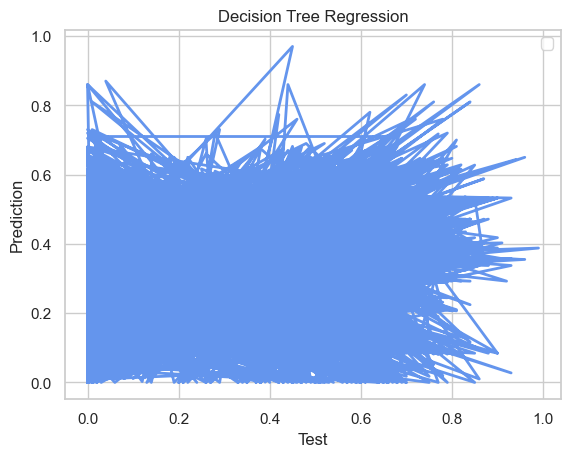

In [169]:
plt.plot(y_test_advanced, prediction_dtr, color="cornflowerblue", linewidth=2)

plt.xlabel("Test")
plt.ylabel("Prediction")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

##### Linear Regression

In [160]:
lr_advanced = LinearRegression()
lr_advanced.fit(X_train_advanced,y_train_advanced)

y_pred_advanced = lr_advanced.predict(X_test_advanced)


Metrics 

In [210]:
mse = metrics.mean_squared_error(y_test_advanced, y_pred_advanced)
mae = metrics.mean_absolute_error(y_test_advanced, y_pred_advanced)
rmse = np.sqrt(metrics.mean_squared_error(y_test_advanced, y_pred_advanced))
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

score = metrics.r2_score(y_test_advanced,y_pred_advanced )
print(f'R-squared (from score method): {score}')

MSE: 0.03918884849034859
MAE: 0.1617597488988863
RMSE: 0.1979617349144743
R-squared (from score method): 0.0719013075410121


Scatter Plot

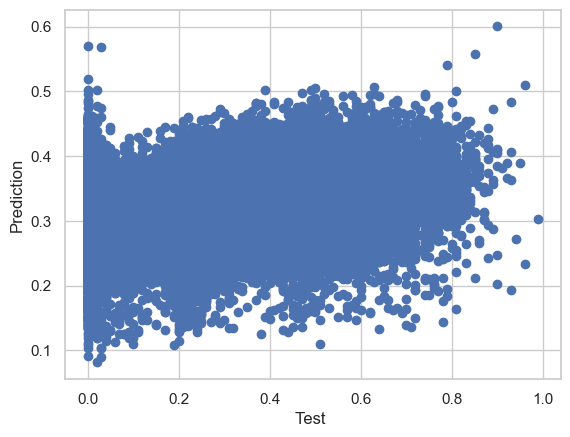

In [168]:
plt.scatter(y_test_advanced,y_pred_advanced)
plt.xlabel("Test ")
plt.ylabel("Prediction")
plt.show()

##### Support Vector Regression

In [175]:
regr = svm.SVR()
regr.fit(X_train_advanced, y_train_advanced)
svc_pred = regr.predict(X_test_advanced)

Metrics

In [180]:
mse = metrics.mean_squared_error(y_test_advanced, svc_pred)
mae = metrics.mean_absolute_error(y_test_advanced, svc_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test_advanced, svc_pred))
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

score = metrics.r2_score(y_test_advanced, svc_pred)
print(f'R-squared (from score method): {score}')


MSE: 0.032340652284307034
MAE: 0.1372123924196571
RMSE: 0.17983506967303967
R-squared (from score method): 0.2340852498963245


Plots

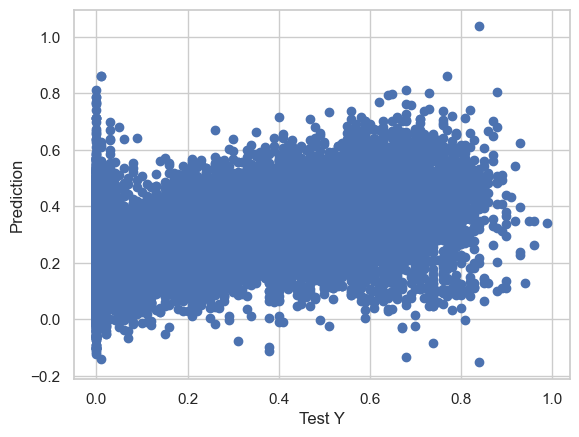

In [148]:
plt.scatter(y_test_advanced,svc_pred)
plt.xlabel("Test Y")
plt.ylabel("Prediction")
plt.show()

#### Models After Feature Selection


In [261]:
X_ad = last_advanced_prep.drop(['popularity'], axis=1)
y_ad = last_advanced_prep['popularity']

X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(X_ad, y_ad, test_size=0.3, random_state=2022)


##### Decison Tree

In [262]:
dtr2 = DecisionTreeRegressor(max_depth=11)

dtr2.fit(X_train_ad, y_train_ad)
prediction_dtr = dtr.predict(X_test_ad)

print(dtr2.score(X_test_ad, y_test_ad))

0.13159209286090134


In [263]:
mse = metrics.mean_squared_error(y_test_ad, prediction_dtr)
mae = metrics.mean_absolute_error(y_test_ad, prediction_dtr)
rmse = np.sqrt(metrics.mean_squared_error(y_test_ad, prediction_dtr))
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

score = dtr2.score(X_test_ad, y_test_ad)
print(f'R-squared (from score method): {score}')

MSE: 0.03710526240146765
MAE: 0.14946073674666221
RMSE: 0.19262726287176396
R-squared (from score method): 0.13159209286090134


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


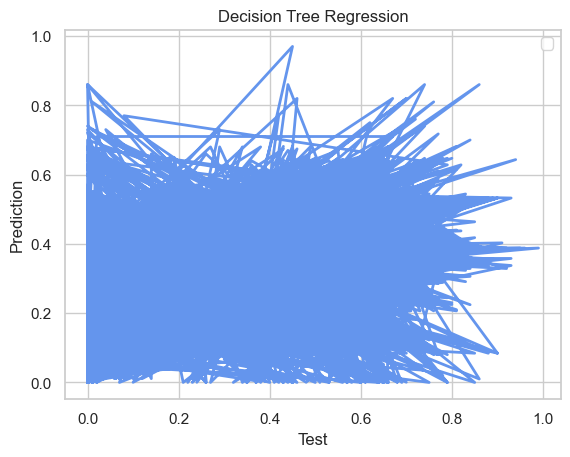

In [264]:
plt.plot(y_test_ad, prediction_dtr, color="cornflowerblue", linewidth=2)

plt.xlabel("Test")
plt.ylabel("Prediction")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

##### Linear Regression

In [268]:
lr_ad = LinearRegression()
lr_ad.fit(X_train_ad,y_train_ad)
y_pred_ad = lr_ad.predict(X_test_ad)

Metrics 

In [269]:
mse = metrics.mean_squared_error(y_test_ad, y_pred_ad)
mae = metrics.mean_absolute_error(y_test_ad, y_pred_ad)
rmse = np.sqrt(metrics.mean_squared_error(y_test_ad, y_pred_ad))
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

score = lr_ad.score(X_test_ad, y_test_ad)
print(f'R-squared (from score method): {score}')

MSE: 0.039242328032326156
MAE: 0.16181700561793022
RMSE: 0.19809676431563983
R-squared (from score method): 0.07218533256885662


Scatter Plot

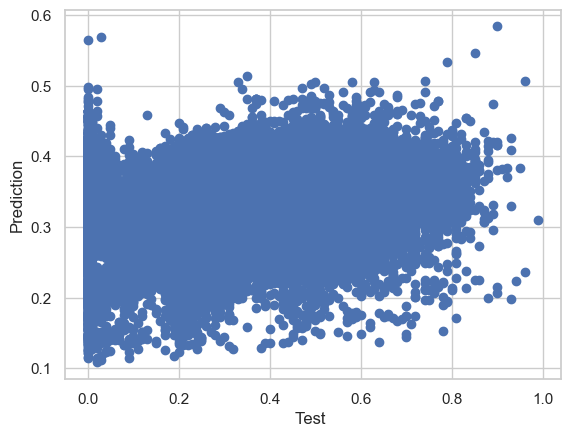

In [270]:
plt.scatter(y_test_advanced,y_pred_advanced)
plt.xlabel("Test ")
plt.ylabel("Prediction")
plt.show()

##### Support Vector Regression

In [271]:
svr_ad = svm.SVR()
svr_ad.fit(X_train_ad, y_train_ad)
svc_ad_pred = svr_ad.predict(X_test_ad)

Metrics

In [247]:
mse = metrics.mean_squared_error(y_test_ad, svc_ad_pred)
mae = metrics.mean_absolute_error(y_test_ad, svc_ad_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test_ad, svc_ad_pred))
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

score = metrics.r2_score(y_test_ad, svc_ad_pred)
print(f'R-squared (from score method): {score}')


MSE: 0.03254271021161914
MAE: 0.13747650175202575
RMSE: 0.1803959816947682
R-squared (from score method): 0.2292999677213322


Plots

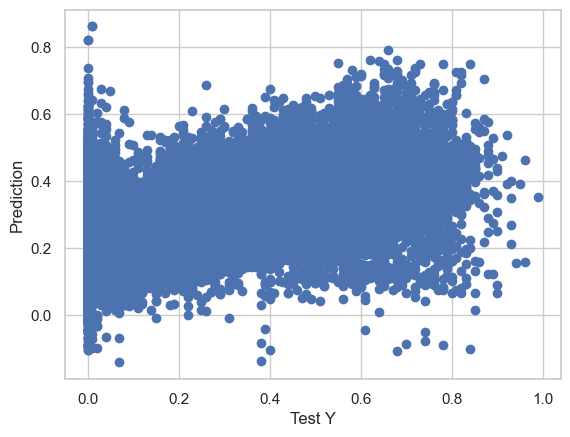

In [250]:
plt.scatter(y_test_ad,svc_ad_pred)
plt.xlabel("Test Y")
plt.ylabel("Prediction")
plt.show()

##### Random Forrest Regressor

In [291]:
from sklearn.ensemble import RandomForestRegressor

X = last_advanced_prep.drop('popularity', axis=1)
y = last_advanced_prep['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

predictions = rfr.predict(X_test)
mse = metrics.mean_squared_error(y_test, predictions)
r2 = metrics.r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}") 
print(f"R-squared: {r2}") 

Mean Squared Error: 0.028773131293511008
R-squared: 0.3204730420858425


##### Cross-Validation RFR 

In [274]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rfr, X_train, y_train.ravel(), cv=10, scoring='r2')
print(cv_scores)

[0.30959623 0.33402185 0.31899869 0.30477134 0.33251496 0.32053943
 0.33149964 0.31510493 0.3332054  0.33083278]


In [276]:
mse = metrics.mean_squared_error(y_test, predictions)
mae = metrics.mean_absolute_error(y_test, predictions)
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
r2 = metrics.r2_score(y_test, predictions)
r2_score_value = rfr.score(X_test, y_test)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R-squared : {r2}')
print(f'R-squared (from score method): {r2_score_value}')

MSE: 0.028756199875086444
MAE: 0.1257589473143257
RMSE: 0.1695765310268094
R-squared : 0.32087290988873574
R-squared (from score method): 0.32087290988873574


##### GridSearch RFR

In [292]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

print("Best Parameters:")
print(best_params)

best_model = grid_search.best_estimator_
best_predictions = best_model.predict(X_test)

best_mse = metrics.mean_squared_error(y_test, best_predictions)
best_r2 = metrics.r2_score(y_test, best_predictions)

print("\nBest Model Results:")
print(f"Mean Squared Error: {best_mse}")
print(f"R-squared: {best_r2}")

/Users/josef/miniconda3/envs/DAA_3.10/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 